In [2]:
from selenium import webdriver

In [ ]:
driver = webdriver.Chrome()

### Selenium

- 프론트엔드 테스팅 하는 것을 목적으로 만들어짐
- https://www.seleniumhq.org/
- 모든 브라우저 버전을 다 지원하지 못해서 브라우저 구버전이 더 호환이 잘 된다.
- selenium 기본 사용법
- 파일 업로드, 다운로드
    - google vision api 웹페이지 실습 (이미지 파일 코드로 업로드 해 볼 것)
- 스크래핑
    - 웹 데이터를 가지고 오는 것
    - gmarket 베스트 셀러 200 아이템 정보 수집 (beautifulsoup으로도 된다.)
    - 네이버 메일(본인계정) 데이터 수집 (로그인 해서 들어가서 안의 데이터를 수집하는 것을 실습)
- 자동화
    - 워드프레스 블로그에 자동으로 댓글을 작성
- 이미지 스크린샷
    - youtube 페이지로 실습(설정한 시간대의 영상을 띄우고 전체 페이지를 크롤링 할 것) 
    - 영상부분이 보이는 엘리먼트의 좌표값을 가져와서 이미지를 자를 것이다.
    - pillow : python 이미지 처리 패키지, 자를 때 pillow 사용할 것 (흑백으로 바꾸거나, 사이즈 변화: 계산량 줄일 수 있다, 이미지 자르기 등)
    

- - -
#### 1. 기본 사용법

In [15]:
# 브라우져 열기
# driver 는 브라우저 객체
driver = webdriver.Chrome()

# 3가지 방법으로 설정 가능 
# 1. 글로벌 방법으로 연다. 2. 같은 디렉토리 내에 chromedriver 있으면 사용 3. executable_path

In [56]:
# 페이지 이동
driver.get("https://www.naver.com")

In [9]:
# webdriver 모듈에 chrome이라는 클래스의 객체를 생성해서 여는 것이다. 
# 브라우져 오브젝트 - 객체 안에 여러 함수들 있다.
# 윈도우 오브젝트 - 브라우져 오브젝트 안에 여러 탭

In [11]:
# 브라우져의 윈도우 사이즈 조절 
driver.set_window_size(800, 600) #(가로, 세로)
# windowHandle = 
# 반응형 웹페이지 만들때 체크할 때 사용됨

In [13]:
# 스크롤 조절 (driver object에 없다. js코드 사용해서 )
script = "window.scrollTo(500,300);" # (가로, 세로) # window js 기본 객체에 스크롤 하는 기능 있다.
driver.execute_script(script)

In [26]:
# 현재 윈도우 객체를 저장
main_window = driver.current_window_handle #드라이브 오브젝트 안에 current 객체를 참조시킨다.
main_window

'CDwindow-A3E0CA212A4FACDE3174F334A86E9EE2'

In [17]:
### 파이썬 repr 공부하기!!!!

In [18]:
# 새로운 윈도우 탭 하나 더 열기 (js로 실행해야 함)
script = "window.open('http://google.com');"
driver.execute_script(script)

In [19]:
driver.current_window_handle

'CDwindow-A3E0CA212A4FACDE3174F334A86E9EE2'

In [20]:
# 구글이 새로 켜졌지만 naver에 focusing이 되어 있는 것

In [21]:
# 열려있는 윈도우로 바꾸는 방법

In [22]:
# 윈도우 탭 객체 확인 window_handles 변수안에 열려있는 window가 리스트로 저장되어 있음
windows = driver.window_handles
windows

['CDwindow-A3E0CA212A4FACDE3174F334A86E9EE2',
 'CDwindow-EE3B6B16155BE62C6D25B993DAEC6C28']

In [31]:
# 현재 윈도우 탭 설정
driver.switch_to_window(windows[1])

In [32]:
# 페이지 새로고침
script = "location.reload();" # js 실행하면 새로 고침 된다.
driver.execute_script(script)

In [33]:
# 크롤링 하다가 alert 생기는 경우, alert 컨트롤 하는 방법
# 1. alert
# 2. confirm

In [40]:
# 1. alert
script = "alert('data science');"
driver.execute_script(script)

In [41]:
alert = driver.switch_to_alert()
alert.text

'data science'

In [42]:
alert.accept() 
# alert 없애준다. alert 컨트롤 가능

In [53]:
# 2. confirm: 취소 확인 두개 다 있다. alert, confirm 최근 만들어진 페이지에서는 많이 사용하지 않는다. 과거에 만든 정부 페이지들 많음
script = "confirm('test selenium');"
driver.execute_script(script)

In [54]:
confirm = driver.switch_to_alert()
confirm.text

'test selenium'

In [55]:
confirm.dismiss()
# confirm.accept() : 확인 버튼 클릭
# confirm.dismiss() : 취소 버튼 클릭

In [58]:
# input 엘리먼트에 문자열 넣기
driver.find_element_by_css_selector("#query")\
.send_keys("패스트 캠퍼스")

In [60]:
# 검색 버튼 클릭
driver.find_element_by_css_selector("#search_btn")\
.click()

In [61]:
# driver.find_element_by_class_name() 뒤에 클래스 명만 넣어도 select 되게 한다.
# driver.find_element_by_id() 뒤에 아이디 명만 넣거나

# 두개 다르다!
# find_elements = select
# find_element = select_one

In [63]:
# 현재 윈도우 닫기 : close() 다음 윈도우가 현재 윈도우가 된다. 하나 남아 있을 때 close하면 broweser 도 함께 닫힌다.
driver.close()

In [3]:
# 브라우져 닫기 : 전체가 다 닫히고, selenium 쓸 때 이걸로 닫아주는 것이 메모리 운영에 좋다. 안 닫으면 오브젝트 메모리에 살아있다. 메모리 차서 가상 메모리 쓰기 때문에 
driver.quit()

#### 파일 업로드
- google vision api 페이지
- vision api 페이지로 이동 후
- iframe으로 frame 을 수정
- 이미지 파일을 업로드
- web data 와 document data를 수집

In [4]:
# 구글 비전 api페이지 이동
url = "https://cloud.google.com/vision/"
driver = webdriver.Chrome()
driver.get(url)
# 켜진 driver 최대한 안만지는 것이 좋다. 인식 못할 수 도 있음

In [5]:
# iframe 영역으로 이동, frame 변경
iframe = driver.find_element_by_css_selector\
("#vision_demo_section > iframe")
driver.switch_to_frame(iframe)

# iframe 영역에 있는데 frame iframe으로 변경하지 않으면 엘리먼트 없다고 자꾸 뜬다.

In [6]:
# 메인 프레임으로 변경
# driver.switch_to_default_content()

In [7]:
# 파일 업로드 
# 파일 경로를 쓸때는 절대 경로로 사용해야 합니다.
# window / \\ 양쪽 다르게 나오는 경우 있어서 잘 안되면  다르게 해주는 게 좋다.
file_path = "/Users/hyelanjeong/ds/hyelansgithub/fastcampus-programming/web/dog.png"
driver.find_element_by_css_selector("#input")\
.send_keys(file_path)
# 자동으로 이미지 업로드 된다.

In [8]:
# 웹데이터 가지고 오기
driver.find_element_by_css_selector("#webDetection").click()

WebDriverException: Message: unknown error: Element <iframe frameborder="0" scrolling="no" height="150px" style="width: 1px; min-width: 100%; height: 585px;" cd_frame_id_="04569ba3885e8df76d3a102a6fd4e095"></iframe> is not clickable at point (340, 23). Other element would receive the click: <div class="devsite-product-name-wrapper">...</div>
  (Session info: chrome=67.0.3396.87)
  (Driver info: chromedriver=2.35.528157 (4429ca2590d6988c0745c24c8858745aaaec01ef),platform=Mac OS X 10.13.4 x86_64)


In [99]:
driver.quit()

In [9]:
results = driver.find_elements_by_css_selector\
("#card .container > .row")[:15]

for result in results:
    print(
    result.find_element_by_css_selector('.name').text,
    result.find_element_by_css_selector('.score').text,
    )

In [ ]:
driver.find_element_by_css_selector("#fullTextAnnotation").click()

In [ ]:
fieldsets = driver.find_elements_by_css_selector(".page > container.style-scope.vs-document > fieldset")
len(fieldsets)

In [ ]:
# 워드 하나하나를 리스트 형태로 만들것

documents = [] # 문장 2개가 들어갑니다.

for fieldsets in fieldsets:
    words = fieldset.find_elements_by_css_selector(".container .word")
    # print(len(words)) : 워드 값 갯수 알아보기
    word_list = []
    for word in words:
        word = word.text.replace(" ","").replace(" ","")
        # print(word)
        word_list.append(word)
    documents.append(" ".join(word_list))
        
documents # 두개의 문장이 출력된다.

# 문자열을 가지고 오게 된다.

In [11]:
driver.quit()

- - -

In [25]:
import pandas as pd

#### 스크래핑
- gmarket 베스트 200 데이터 수집
- http://corners.gmarket.co.kr/Bestsellers

In [14]:
url = "http://corners.gmarket.co.kr/Bestsellers"

In [15]:
driver = webdriver.Chrome()
driver.get(url)

In [33]:
items = driver.find_elements_by_css_selector(".best-list:nth-child(3) > ul > li")

dict_list = [] # 아이템 하나씩 딕셔너리 형태로 들어간다.

for item in items:
    dict_list.append({
        "title":item.find_element_by_css_selector(".itemname").text,
        "link":item.find_element_by_css_selector(".itemname").get_attribute("href"), # get attribute 를 이용해서  속성의 key값 입력하면 value가 나온다.
        "o-price":item.find_element_by_css_selector(".o-price").text.replace(",","")[:-1], # 숫자 데이터로 바꾸고 싶을때 
        "s-price":item.find_element_by_css_selector(".s-price").text.split(" ")[0].replace(",","")[:-1],
        
    })
    
df = pd.DataFrame(dict_list)
df

,link,o-price,s-price,title
0,http://item.gmarket.co.kr/Item?goodscode=62724...,19500,5900,더다다/원피스형 롱티/신상/루즈/박시/빅사이즈
1,http://item.gmarket.co.kr/Item?goodscode=14301...,39000,28470,[아디다스]니짜 CQ2332외 4종 택1 G/ 아디다스
2,http://item.gmarket.co.kr/Item?goodscode=63617...,30000,12900,[동원샘물미네마인]동원 샘물 2Lx9병x3팩(총 27병) /생수
3,http://item.gmarket.co.kr/Item?goodscode=41037...,24000,4900,[아망떼]1+1여름베개커버/인견/순면/30x50/40x60/50x70
4,http://item.gmarket.co.kr/Item?goodscode=14365...,39900,32900,[하기스]2018년형 에어솔솔 썸머 팬티 / 밴드 기저귀 2팩
5,http://item.gmarket.co.kr/Item?goodscode=13005...,20000,12900,[하림]하림 프로라인 치킨너겟 1kg 2봉+치킨너겟 100g(증정)
6,http://item.gmarket.co.kr/Item?goodscode=87359...,30000,13900,[동원덴마크우유]동원 인포켓치즈 20g x20개+(저키x8개 or 치즈디퍼즈)
7,http://item.gmarket.co.kr/Item?goodscode=86949...,29600,8900,유스타일팜 여름신상/빅사이즈/밴딩/데님/스커트
8,http://item.gmarket.co.kr/Item?goodscode=91202...,27100,16900,CJ 햇반210gx24개/오뚜기밥24개/컵밥10개/컵반
9,http://item.gmarket.co.kr/Item?goodscode=14298...,29000,14900,나이키 스우시 라운드 반팔 티셔츠


In [36]:
df.columns[df.isnull().values.any()]

array([], shape=(0, 4), dtype=object)

In [ ]:
# 할인율을 컬럼을 추가 (27%)  이렇게 나오게 추가해보기
df["discount_rate"] = round((1 - df["s-price"].astype('int') / df["o-price"].astype('int')) * 100, 0)
df["discount_rate"] = df["discount_rate"].astype('int')
df["discount_rate"] = df["discount_rate"].astype('str')
df["discount_rate"] += "%"
df

- - -
#### 네이버 메일 크롤링
- 네이버 페이지로 이동
- 아이디 패스워드 입력
- 로그인 버튼을 클릭
- 메일 페이지로 이동
- 메일 페이지에서 메일 데이터를 수집

In [ ]:
mail_ur = "https://mail.naver.com"

In [38]:
# 네이버 페이지로 이동

- - -
#### 자동화
- https://radajin661456067.wordpress.com/
- 2개의 계정, 2개의 메시지, 2개의 게시글에 총 8개의 댓글을 자동으로 작성
- 게시물의 링크를 크롤링
- 각 게시물로 가서 댓글을 작성
    - 스크롤 내리기
    - 댓글 작성 레이어를 클릭
    - 댓글 작성
    - 이메일, 이름 추가
    - 댓글 작성 버튼 클릭

In [39]:
# 브라우져 열기
url = "https://radajin661456067.wordpress.com/"
driver = webdriver.Chrome()
driver.get(url)

In [ ]:
links = []

articles = driver.find_elements_by_css_selector("#main > article")
for article in articles:
    links.append(
        article.find_element_by_css_selector(".entry_title > a").get_attribute("href"))
links

In [ ]:
driver.get(links[0])

In [ ]:
# 스크롤 아래로 내리기
script = "window.scrollTo(0,10000);" #제일 밑으로 내려간다.
driver.execute_script(script)

In [ ]:
# 댓글 작성 영역
driver.find_element_by_css_selector("#comment-form-comment").click()

In [ ]:
# 댓글 작성
driver.find_element_by_css_selector("#comment").send_keys("데사스 8기 B반 화이팅~")

In [ ]:
# 스크롤 아래로 내리기
script = "window.scrollTo(0,10000);" #제일 밑으로 내려간다.
driver.execute_script(script)

In [ ]:
# 이메일 이름 입력
# email, author
driver.find_element_by_css_selector("#email").clear()
driver.find_element_by_css_selector("#email").send_keys("helan.jeong@gmail.com")
driver.find_element_by_css_selector("#author").clear()
driver.find_element_by_css_selector("#author").send_keys("helan")

In [ ]:
# 작성 버튼을 클릭
driver.find_element_by_css_selector("#comment-submit").click()

- - -

In [43]:
def write_comment(driver, link, msg, email, name):
    driver.get(link)
    script = "window.scrollTo(0,10000);" #제일 밑으로 내려간다.
    driver.execute_script(script)
    time.sleep(1) # 약간의 타임슬립 해주는게 좋다.
    driver.find_element_by_css_selector("#comment-form-comment").click()
    time.sleep(1) # 약간의 타임슬립 해주는게 좋다.
    driver.find_element_by_css_selector("#comment").send_keys(msg)
    script = "window.scrollTo(0,10000);" #제일 밑으로 내려간다.
    driver.execute_script(script)
    time.sleep(1) # 약간의 타임슬립 해주는게 좋다.
    driver.find_element_by_css_selector("#email").clear()
    driver.find_element_by_css_selector("#email").send_keys(email)
    time.sleep(1) # 약간의 타임슬립 해주는게 좋다.
    driver.find_element_by_css_selector("#author").clear()
    driver.find_element_by_css_selector("#author").send_keys(name)
    time.sleep(1) # 약간의 타임슬립 해주는게 좋다.
    driver.find_element_by_css_selector("#comment-submit").click()

In [44]:
users = [
    {"name":"helan", "email":"helan.jeong@gmail.com"},
    {"name":"helan", "email":"helan.jeong@naver.com"},
]

msgs = ["hi~~~~", "Hello~~~~"]

for user in users:
    for msg in msgs:
        for link in links:
            print(user["email"], user["name"], msg, end=" - ")
            try:
                write_comment(driver, link, msg, email, name)
                print("성공")
            except:
                print("실패")

- - -

#### 이미지 스크린 샷

- youtube 

In [1]:
import time
from selenium import webdriver
from PIL import Image as pil

https://www.youtube.com/watch?v=UThGcWBIMpU&t=500s

In [4]:
# selenium이용해서 이미지 스크린 샷
url = "https://www.youtube.com/watch?v=UThGcWBIMpU&t=500s"

In [5]:
import time
driver = webdriver.Chrome()
driver.get(url)
time.sleep(1) # 광고 중간에 깨질때가 있어서 안정성 높인다.
driver.save_screenshot("screenshot.png")
driver.quit()

True

In [8]:
# 1초에 한번 스크린샷 뜨고 싶을때
driver = webdriver.Chrome()
driver.get(url)
for idx in range(5):
    time.sleep(1)
    driver.save_screenshot("screenshot_"+str(idx)+".png")
driver.quit()

(2400, 1106)


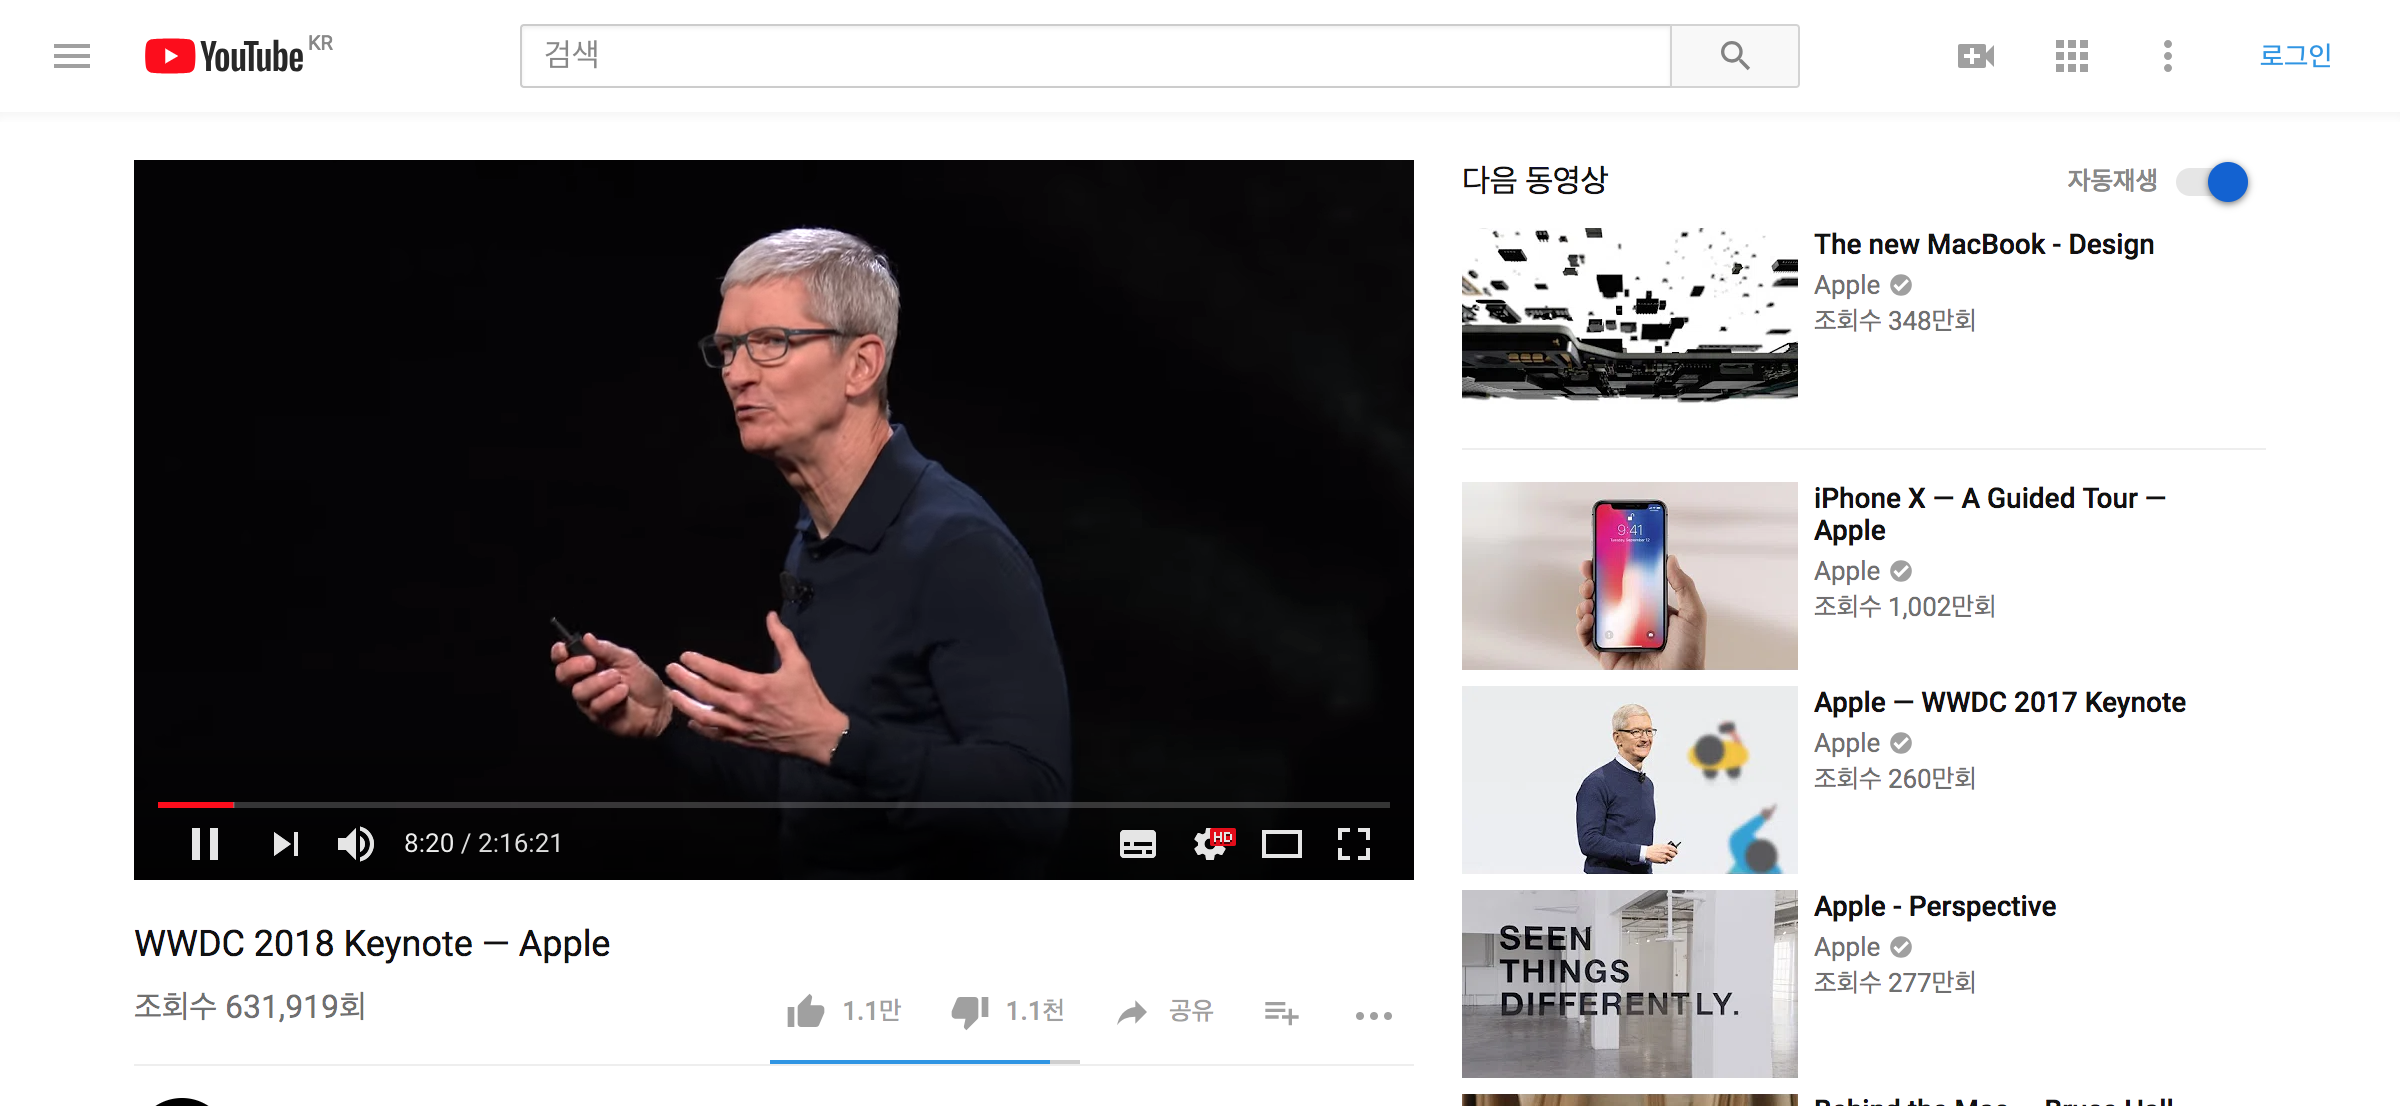

In [10]:
# 이미지 띄우기
pil_im = pil.open("screenshot.png")
print(pil_im.size)
pil_im

In [43]:
# 영역의 위치값 구하기
# id가 player-container 인 엘리먼트 영영의 위치값을 구하기
driver = webdriver.Chrome()
driver.get("https://www.youtube.com/watch?v=UThGcWBIMpU&t=500s")

In [44]:
element = driver.find_element_by_css_selector("#player-container")
location = element.location
size = element.size
location, size

# 좌측 상단의 x,y 좌표값이 x,y 된다.

({'x': 67, 'y': 80}, {'height': 360, 'width': 640})

In [45]:
# 위치값구한 후 driver 닫는다.
driver.quit()

In [46]:
# top, bottom, left, right 값을 구해야한다. 자를 때 이 4개의 값 필요하다.
# 레티나 디스플레이의 경우 *2를 해줘야 한다.
left = location['x'] *2
top = location['y'] *2
right = location['x'] + size["width"] *2
bottom = location['y'] + size["height"] *2
area = (left, top, right, bottom)
area

(134, 160, 1347, 800)

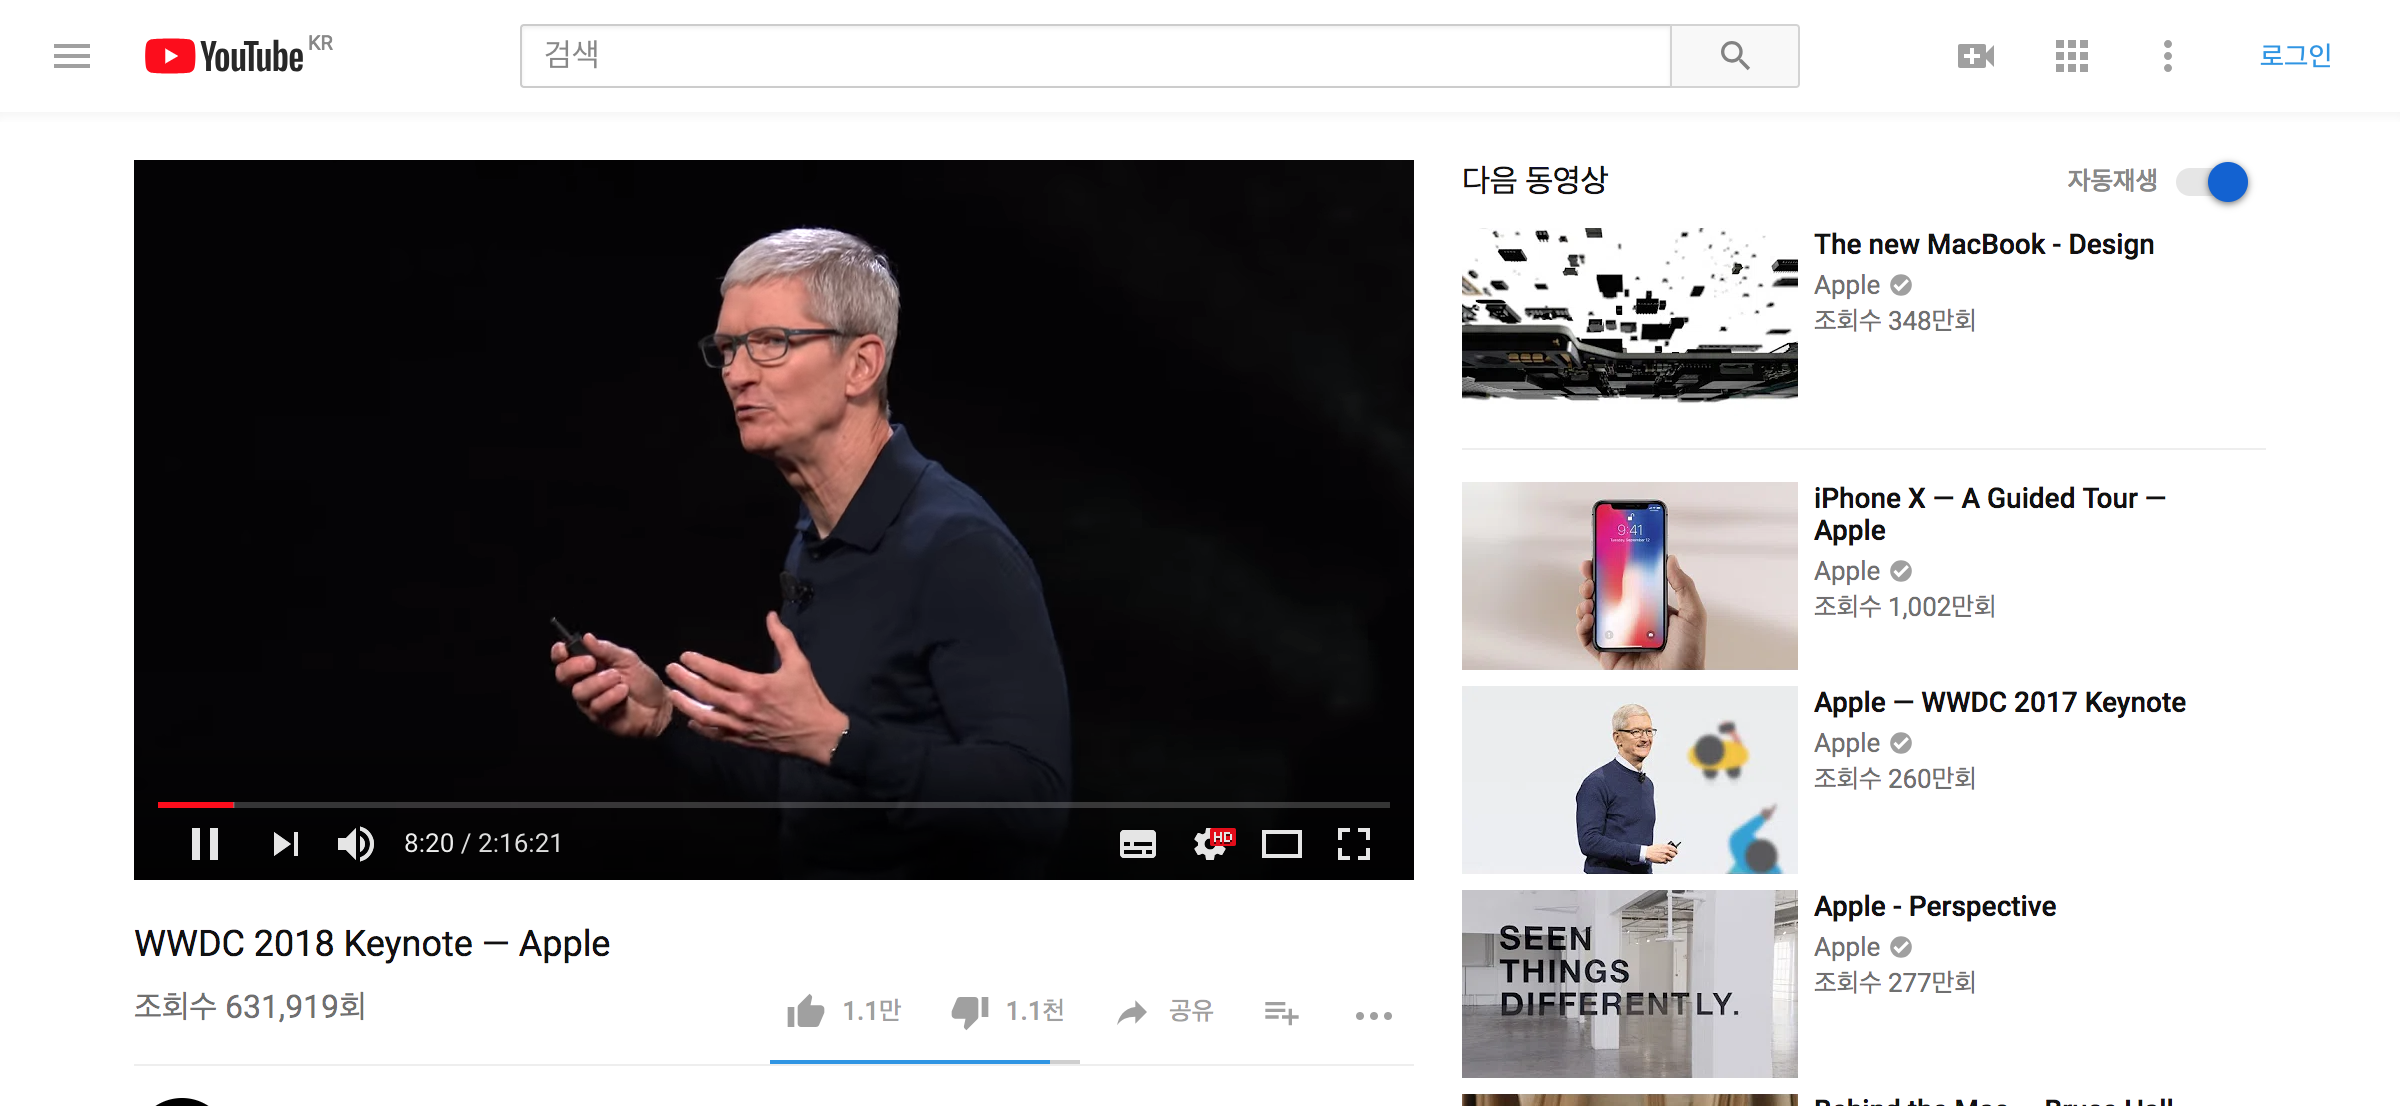

In [47]:
pil_im = pil.open("screenshot.png")
pil_im

In [48]:
pil_im = pil_im.crop(area)

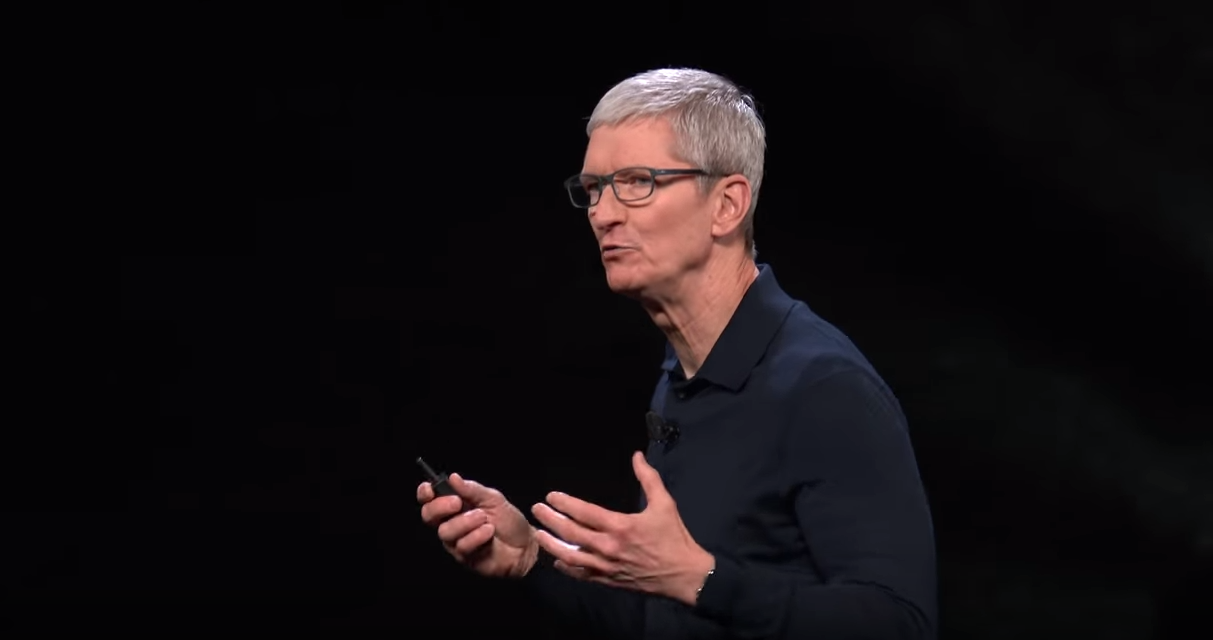

In [49]:
pil_im

In [22]:
pil_im.save("screenshot_element.png")

In [35]:
# 하단의 재생 기능 영역 자르기
driver = webdriver.Chrome()
driver.get(url)

In [36]:
element = driver.find_element_by_css_selector('.ytp-chrome-bottom')
location = element.location
size = element.size
location, size

({'x': 79, 'y': 486}, {'height': 39, 'width': 616})

In [37]:
left = location['x'] *2
top = location['y'] *2
right = location['x'] + size["width"] *2
bottom = location['y'] + size["height"] *2 -39
area = (left, top, right, bottom)
area

(158, 972, 1311, 525)

In [38]:
pil_im = pil.open("screenshot.png")
pil_im = pil_im.crop(area)
pil_im

SystemError: tile cannot extend outside image

<PIL.Image.Image image mode=RGBA size=1153x0 at 0x10E41D048>

In [34]:
driver.quit()

In [39]:
# 연습하기 좋은 것, 다음이나 네이버의 실시간 키워드 스크린 샷 떠서 자른 후 이미지를 구글 비전 api 올려서 text 데이터 따보기

In [50]:
pil_im.size

(1213, 640)

In [52]:
# 썸네일 : 원본 이미지에서 사이즈 줄인 이미지
# 내가 이미지 업로드 하는 순간 px값 다른 썸네일 여러개 만들어서 함께 저장한다.
# 원본 2400px
# 1200px
# 600px
# 300px
# 트래픽 줄일 수 있다.

In [53]:
# 썸네일 만들기, 이미지 사이즈 축소
pil_im.thumbnail((600, 300))

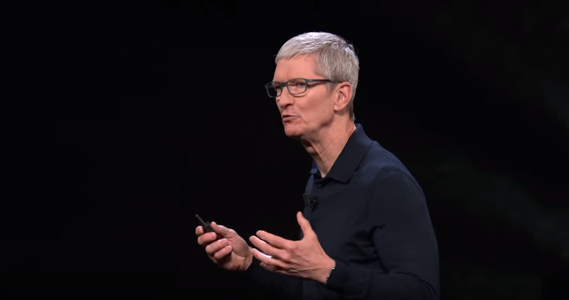

In [54]:
pil_im

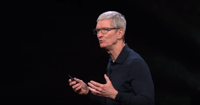

In [55]:
pil_im.thumbnail((200, 160))
pil_im

In [56]:
pil_im.size

(200, 105)

In [58]:
pil_im.save("thumbnail.png")